In [3]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import sys
from scipy.stats import dirichlet
import seaborn as sns
sns.set(style='whitegrid')

In [4]:
from twitpol import config

In [2]:
ground_truth_polls_df = pd.read_csv(config.DATA / 'ground_truth' / 'ground_truth_polling.csv', index_col=0)
best_guess_polling_df = pd.read_csv(config.DATA / 'ground_truth' / 'best_guess_polling.csv', index_col=0)

In [3]:
best_guess_polling_df.head()

,Biden,Warren,Sanders,Harris,Buttigieg
2019-03-15,34.145025,6.765267,25.505591,8.302274,1.063122
2019-03-16,31.785395,6.611651,22.830279,9.930275,1.063073
2019-03-17,31.185770,6.705620,22.120069,10.536104,1.091549
2019-03-18,27.867000,7.004912,22.319129,11.351785,1.441305
2019-03-19,27.167000,7.317797,22.457849,11.474184,1.974093


In [4]:
best_guess_polling_df = best_guess_polling_df.reset_index()
best_guess_polling_df['index'] = pd.to_datetime(best_guess_polling_df['index'])
best_guess_polling_df = best_guess_polling_df.set_index('index')
best_guess_polling_df.head()

,Biden,Warren,Sanders,Harris,Buttigieg
index,,,,,
2019-03-15,34.145025,6.765267,25.505591,8.302274,1.063122
2019-03-16,31.785395,6.611651,22.830279,9.930275,1.063073
2019-03-17,31.185770,6.705620,22.120069,10.536104,1.091549
2019-03-18,27.867000,7.004912,22.319129,11.351785,1.441305
2019-03-19,27.167000,7.317797,22.457849,11.474184,1.974093


In [5]:
best_guess_5D = best_guess_polling_df.iloc[::5, :]

In [6]:
best_guess_5D.head()

,Biden,Warren,Sanders,Harris,Buttigieg
index,,,,,
2019-03-15,34.145025,6.765267,25.505591,8.302274,1.063122
2019-03-20,29.083942,6.197857,22.825260,10.335969,1.943431
2019-03-25,31.621468,5.159134,22.584114,8.513098,2.617290
2019-03-30,32.212866,5.912284,21.760385,7.947337,2.608853
2019-04-04,29.863564,4.946338,18.530104,7.778044,2.563909


In [7]:
print(best_guess_5D.shape)
best_guess_5D.head()

(51, 5)


,Biden,Warren,Sanders,Harris,Buttigieg
index,,,,,
2019-03-15,34.145025,6.765267,25.505591,8.302274,1.063122
2019-03-20,29.083942,6.197857,22.825260,10.335969,1.943431
2019-03-25,31.621468,5.159134,22.584114,8.513098,2.617290
2019-03-30,32.212866,5.912284,21.760385,7.947337,2.608853
2019-04-04,29.863564,4.946338,18.530104,7.778044,2.563909


In [36]:
tweet_df = pd.read_csv(config.DATA / 'tweet_counts' / 'FINAlFINALFINALFINAL.csv', index_col=0)
tweet_df.head()

,Date,Ground truth_Warren,Number of tweets (ALL)_Warren,Number of tweets >= 0.5_Warren,Number of tweets >= 0.6_Warren,Number of tweets >= 0.7_Warren,Ground truth_Biden,Number of tweets (ALL)_Biden,Number of tweets >= 0.5_Biden,Number of tweets >= 0.6_Biden,Number of tweets >= 0.7_Biden,Ground truth_Sanders,Number of tweets (ALL)_Sanders,Number of tweets >= 0.5_x,Number of tweets >= 0.6_Sanders,Number of tweets >= 0.7_x,Ground truth_Harris,Number of tweets (ALL)_Harris,Number of tweets >= 0.5_y,Number of tweets >= 0.6_Harris,Number of tweets >= 0.7_y,Ground truth_Buttigieg,Number of tweets (ALL)_Buttigieg,Number of tweets >= 0.5,Number of tweets >= 0.6_Buttigieg,Number of tweets >= 0.7
0,2019-03-03,7.484042,4548.0,1474.0,1165.0,874.0,33.819893,4520.0,1565.0,1075.0,617.0,25.342851,4560.0,1938.0,1465.0,1011.0,9.540914,840.0,284.0,221.0,151.0,1.814704,2385.0,1649.0,1383.0,1157.0
1,2019-03-04,7.484042,2060.0,658.0,524.0,395.0,33.819893,1780.0,520.0,384.0,213.0,25.371972,2840.0,1127.0,859.0,599.0,9.533104,680.0,259.0,193.0,132.0,1.819717,706.0,460.0,412.0,328.0
2,2019-03-05,7.484042,NaN,NaN,NaN,NaN,33.819893,3327.0,1090.0,739.0,453.0,25.391386,4040.0,1666.0,1252.0,916.0,9.527897,620.0,270.0,200.0,146.0,1.823058,1324.0,851.0,727.0,605.0
3,2019-03-06,7.484042,1166.0,498.0,411.0,303.0,33.819893,2878.0,942.0,644.0,353.0,24.945807,1080.0,398.0,294.0,209.0,9.484149,3440.0,1370.0,917.0,639.0,1.825446,1200.0,780.0,678.0,558.0
4,2019-03-07,7.484042,2411.0,922.0,804.0,579.0,33.819893,4622.0,1595.0,1133.0,687.0,24.528590,1200.0,450.0,345.0,251.0,9.441251,2540.0,1118.0,807.0,558.0,1.829362,990.0,681.0,618.0,537.0


In [37]:
tweet_df['Date'] = pd.to_datetime(tweet_df['Date'])
tweet_df = tweet_df.set_index('Date')
tweet_df.head()

,Ground truth_Warren,Number of tweets (ALL)_Warren,Number of tweets >= 0.5_Warren,Number of tweets >= 0.6_Warren,Number of tweets >= 0.7_Warren,Ground truth_Biden,Number of tweets (ALL)_Biden,Number of tweets >= 0.5_Biden,Number of tweets >= 0.6_Biden,Number of tweets >= 0.7_Biden,Ground truth_Sanders,Number of tweets (ALL)_Sanders,Number of tweets >= 0.5_x,Number of tweets >= 0.6_Sanders,Number of tweets >= 0.7_x,Ground truth_Harris,Number of tweets (ALL)_Harris,Number of tweets >= 0.5_y,Number of tweets >= 0.6_Harris,Number of tweets >= 0.7_y,Ground truth_Buttigieg,Number of tweets (ALL)_Buttigieg,Number of tweets >= 0.5,Number of tweets >= 0.6_Buttigieg,Number of tweets >= 0.7
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2019-03-03,7.484042,4548.0,1474.0,1165.0,874.0,33.819893,4520.0,1565.0,1075.0,617.0,25.342851,4560.0,1938.0,1465.0,1011.0,9.540914,840.0,284.0,221.0,151.0,1.814704,2385.0,1649.0,1383.0,1157.0
2019-03-04,7.484042,2060.0,658.0,524.0,395.0,33.819893,1780.0,520.0,384.0,213.0,25.371972,2840.0,1127.0,859.0,599.0,9.533104,680.0,259.0,193.0,132.0,1.819717,706.0,460.0,412.0,328.0
2019-03-05,7.484042,NaN,NaN,NaN,NaN,33.819893,3327.0,1090.0,739.0,453.0,25.391386,4040.0,1666.0,1252.0,916.0,9.527897,620.0,270.0,200.0,146.0,1.823058,1324.0,851.0,727.0,605.0
2019-03-06,7.484042,1166.0,498.0,411.0,303.0,33.819893,2878.0,942.0,644.0,353.0,24.945807,1080.0,398.0,294.0,209.0,9.484149,3440.0,1370.0,917.0,639.0,1.825446,1200.0,780.0,678.0,558.0
2019-03-07,7.484042,2411.0,922.0,804.0,579.0,33.819893,4622.0,1595.0,1133.0,687.0,24.528590,1200.0,450.0,345.0,251.0,9.441251,2540.0,1118.0,807.0,558.0,1.829362,990.0,681.0,618.0,537.0


In [38]:
tweet_df_filtered = tweet_df[['Number of tweets >= 0.6_Warren', 'Number of tweets >= 0.6_Biden',
                             'Number of tweets >= 0.6_Sanders', 'Number of tweets >= 0.6_Harris', 
                              'Number of tweets >= 0.6_Buttigieg']]
tweet_df_filtered.head()

,Number of tweets >= 0.6_Warren,Number of tweets >= 0.6_Biden,Number of tweets >= 0.6_Sanders,Number of tweets >= 0.6_Harris,Number of tweets >= 0.6_Buttigieg
Date,,,,,
2019-03-03,1165.0,1075.0,1465.0,221.0,1383.0
2019-03-04,524.0,384.0,859.0,193.0,412.0
2019-03-05,NaN,739.0,1252.0,200.0,727.0
2019-03-06,411.0,644.0,294.0,917.0,678.0
2019-03-07,804.0,1133.0,345.0,807.0,618.0


In [42]:
tweet_df_filtered.isna().sum()

Number of tweets >= 0.6_Warren       13
Number of tweets >= 0.6_Biden        15
Number of tweets >= 0.6_Sanders      32
Number of tweets >= 0.6_Harris       13
Number of tweets >= 0.6_Buttigieg    22
dtype: int64

In [43]:
tweet_5D_nonan = tweet_df_filtered.iloc[12:, :].resample('5D').mean()

In [53]:
tweet_5D_nonan = tweet_5D_nonan.dropna()

In [54]:
print(tweet_5D_nonan.shape)
tweet_5D_nonan.head()

(46, 5)


,Number of tweets >= 0.6_Warren,Number of tweets >= 0.6_Biden,Number of tweets >= 0.6_Sanders,Number of tweets >= 0.6_Harris,Number of tweets >= 0.6_Buttigieg
Date,,,,,
2019-03-15,400.5,476.75,579.0,1747.8,811.6
2019-03-20,637.0,562.00,562.0,1004.4,1257.2
2019-03-25,791.6,524.60,545.2,1019.8,897.6
2019-03-30,893.5,2182.50,551.6,960.6,995.6
2019-04-04,676.4,738.80,1122.6,946.6,844.0


In [55]:
tweet_5D_nonan.tail()

,Number of tweets >= 0.6_Warren,Number of tweets >= 0.6_Biden,Number of tweets >= 0.6_Sanders,Number of tweets >= 0.6_Harris,Number of tweets >= 0.6_Buttigieg
Date,,,,,
2019-10-06,921.75,464.8,1014.6,3701.20,646.20
2019-10-11,661.60,1116.8,2348.6,3170.80,632.50
2019-10-16,383.20,2527.2,4014.4,4522.00,1340.00
2019-10-21,574.00,497.0,3576.2,1679.75,451.50
2019-10-26,375.20,179.0,522.5,1019.50,806.75


In [56]:
#calculate the mean of the posterior which is a Dirichlet
def calc_mean_posterior(prior, counts):
    posterior_dirichlet_params = prior + counts
    return posterior_dirichlet_params/posterior_dirichlet_params.sum()

In [57]:
def calc_tweet_support_series(poll_df, tweet_counts_df):
    poll_array = poll_df.values
    tweet_counts_array = tweet_counts_df.values
    mean_posteriors = np.zeros(poll_array.shape)
    for i in range(len(poll_array)):
        #calculating scaling factor to make Dirichlet pseudocounts
        #as important as the tweet counts
        scaling = int(tweet_counts_array[i].sum()/poll_array[i].sum())
        prior_dirichlet = scaling * poll_array[i]
        #calculate mean posterior and scale it down to account for people not voting for any of these candidates
        mean_posteriors[i] = calc_mean_posterior(prior_dirichlet, tweet_counts_array[i])*poll_array[i].sum()/100.0
    return mean_posteriors
        

In [58]:
#returns dataframe
def calc_post_mean_df(best_guess_df, tweet_df, index):
    tweet_post_mean = 100*calc_tweet_support_series(best_guess_df, tweet_df)
    t_columns = ['Biden_tweet', 'Warren_tweet', 'Sanders_tweet', 'Harris_tweet', 'Buttigieg_tweet']
    tweet_post_df = pd.DataFrame(tweet_post_mean, index=index, columns=t_columns)
    return tweet_post_df

In [59]:
best_guess_truncated = best_guess_5D.iloc[:tweet_5D_nonan.shape[0],:]

In [60]:
best_guess_truncated.tail()

,Biden,Warren,Sanders,Harris,Buttigieg
index,,,,,
2019-10-06,29.586882,19.284097,16.111211,5.362532,5.108525
2019-10-11,29.745518,19.605995,16.799493,5.719389,4.626038
2019-10-16,31.533854,20.674795,16.749548,5.189449,4.644985
2019-10-21,29.748475,21.857740,16.762588,5.280869,4.900945
2019-10-26,29.736441,20.062611,16.787751,4.774050,5.144030


In [61]:
tweet_post_df = calc_post_mean_df(best_guess_truncated, tweet_5D_nonan, best_guess_truncated.index)
tweet_post_df.head()

,Biden_tweet,Warren_tweet,Sanders_tweet,Harris_tweet,Buttigieg_tweet
index,,,,,
2019-03-15,20.726177,7.891645,18.147354,20.759293,8.256809
2019-03-20,20.103204,8.018189,16.320951,13.960118,11.983997
2019-03-25,23.146826,7.485987,16.342375,13.798713,9.721202
2019-03-30,21.724597,16.740999,14.346963,10.036368,7.592796
2019-04-04,19.836099,7.929262,17.515998,10.874562,7.526038


In [62]:
ground_truth_truncated = ground_truth_polls_df.iloc[12::5,:].iloc[:tweet_5D_nonan.shape[0],:]

In [63]:
ground_truth_truncated

,Biden,Warren,Sanders,Harris,Buttigieg
2019-03-15,33.819893,7.484042,23.385447,9.317469,1.999316
2019-03-20,33.819893,7.484042,23.139221,8.692737,2.575505
2019-03-25,33.819893,7.484042,20.832558,8.313387,2.852775
2019-03-30,33.819893,7.484042,19.902227,8.233352,2.960276
2019-04-04,33.819893,7.484042,20.567847,8.227226,5.022574
2019-04-09,33.819893,7.484042,22.577149,8.123866,6.319336
2019-04-14,33.819893,7.484042,22.603624,7.660101,6.346615
2019-04-19,33.819893,7.484042,19.925914,7.267838,6.235106
2019-04-24,33.819893,7.564886,17.964090,6.907340,6.198864
2019-04-29,33.819893,7.597224,16.124124,6.916570,6.154092


In [88]:
def plot_results(tweet_post_df, ground_truth_df):
    #shift the tweet dataframe since the results are projections for next day
    df_concat = pd.concat([tweet_post_df.shift(1), ground_truth_df], axis=1).dropna()
    fig, ax = plt.subplots(5, 1, figsize=(20,40))
    df_concat[['Biden_tweet','Biden']].plot(ax=ax[0])
    ax[0].set_xlabel('Date', fontsize=20)
    ax[0].set_ylabel('Percentage', fontsize=20)
    ax[0].set_title('Biden: Ground Truth vs Tweet Poll', fontsize=20)
    df_concat[['Warren_tweet','Warren']].plot(ax=ax[1])
    ax[1].set_xlabel('Date', fontsize=20)
    ax[1].set_ylabel('Percentage', fontsize=20)
    ax[1].set_title('Warren: Ground Truth vs Tweet Poll', fontsize=20)
    df_concat[['Sanders_tweet','Sanders']].plot(ax=ax[2])
    ax[2].set_xlabel('Date', fontsize=20)
    ax[2].set_ylabel('Percentage', fontsize=20)
    ax[2].set_title('Sanders: Ground Truth vs Tweet Poll', fontsize=20)
    df_concat[['Harris_tweet','Harris']].plot(ax=ax[3])
    ax[3].set_xlabel('Date', fontsize=20)
    ax[3].set_ylabel('Percentage', fontsize=20)
    ax[3].set_title('Harris: Ground Truth vs Tweet Poll', fontsize=20)
    df_concat[['Buttigieg_tweet','Buttigieg']].plot(ax=ax[4])
    ax[4].set_xlabel('Date', fontsize=20)
    ax[4].set_ylabel('Percentage', fontsize=20)
    ax[4].set_title('Buttigieg: Ground Truth vs Tweet Poll', fontsize=20)
    """
    ground_truth_df.plot(ax=ax[5])
    ax[5].set_xlabel('Date', fontsize=20)
    ax[5].set_ylabel('Percentage', fontsize=20)
    ax[5].set_title('Ground Truth For All Candidates', fontsize=20)
    tweet_post_df.plot(ax=ax[6])
    ax[6].set_xlabel('Date', fontsize=20)
    ax[6].set_ylabel('Percentage', fontsize=20)
    ax[6].set_title('Posterior Support For All Candidates Based On Twitter', fontsize=20)
    """
    plt.savefig("tweet vs ground truth")
    plt.show()
    
    

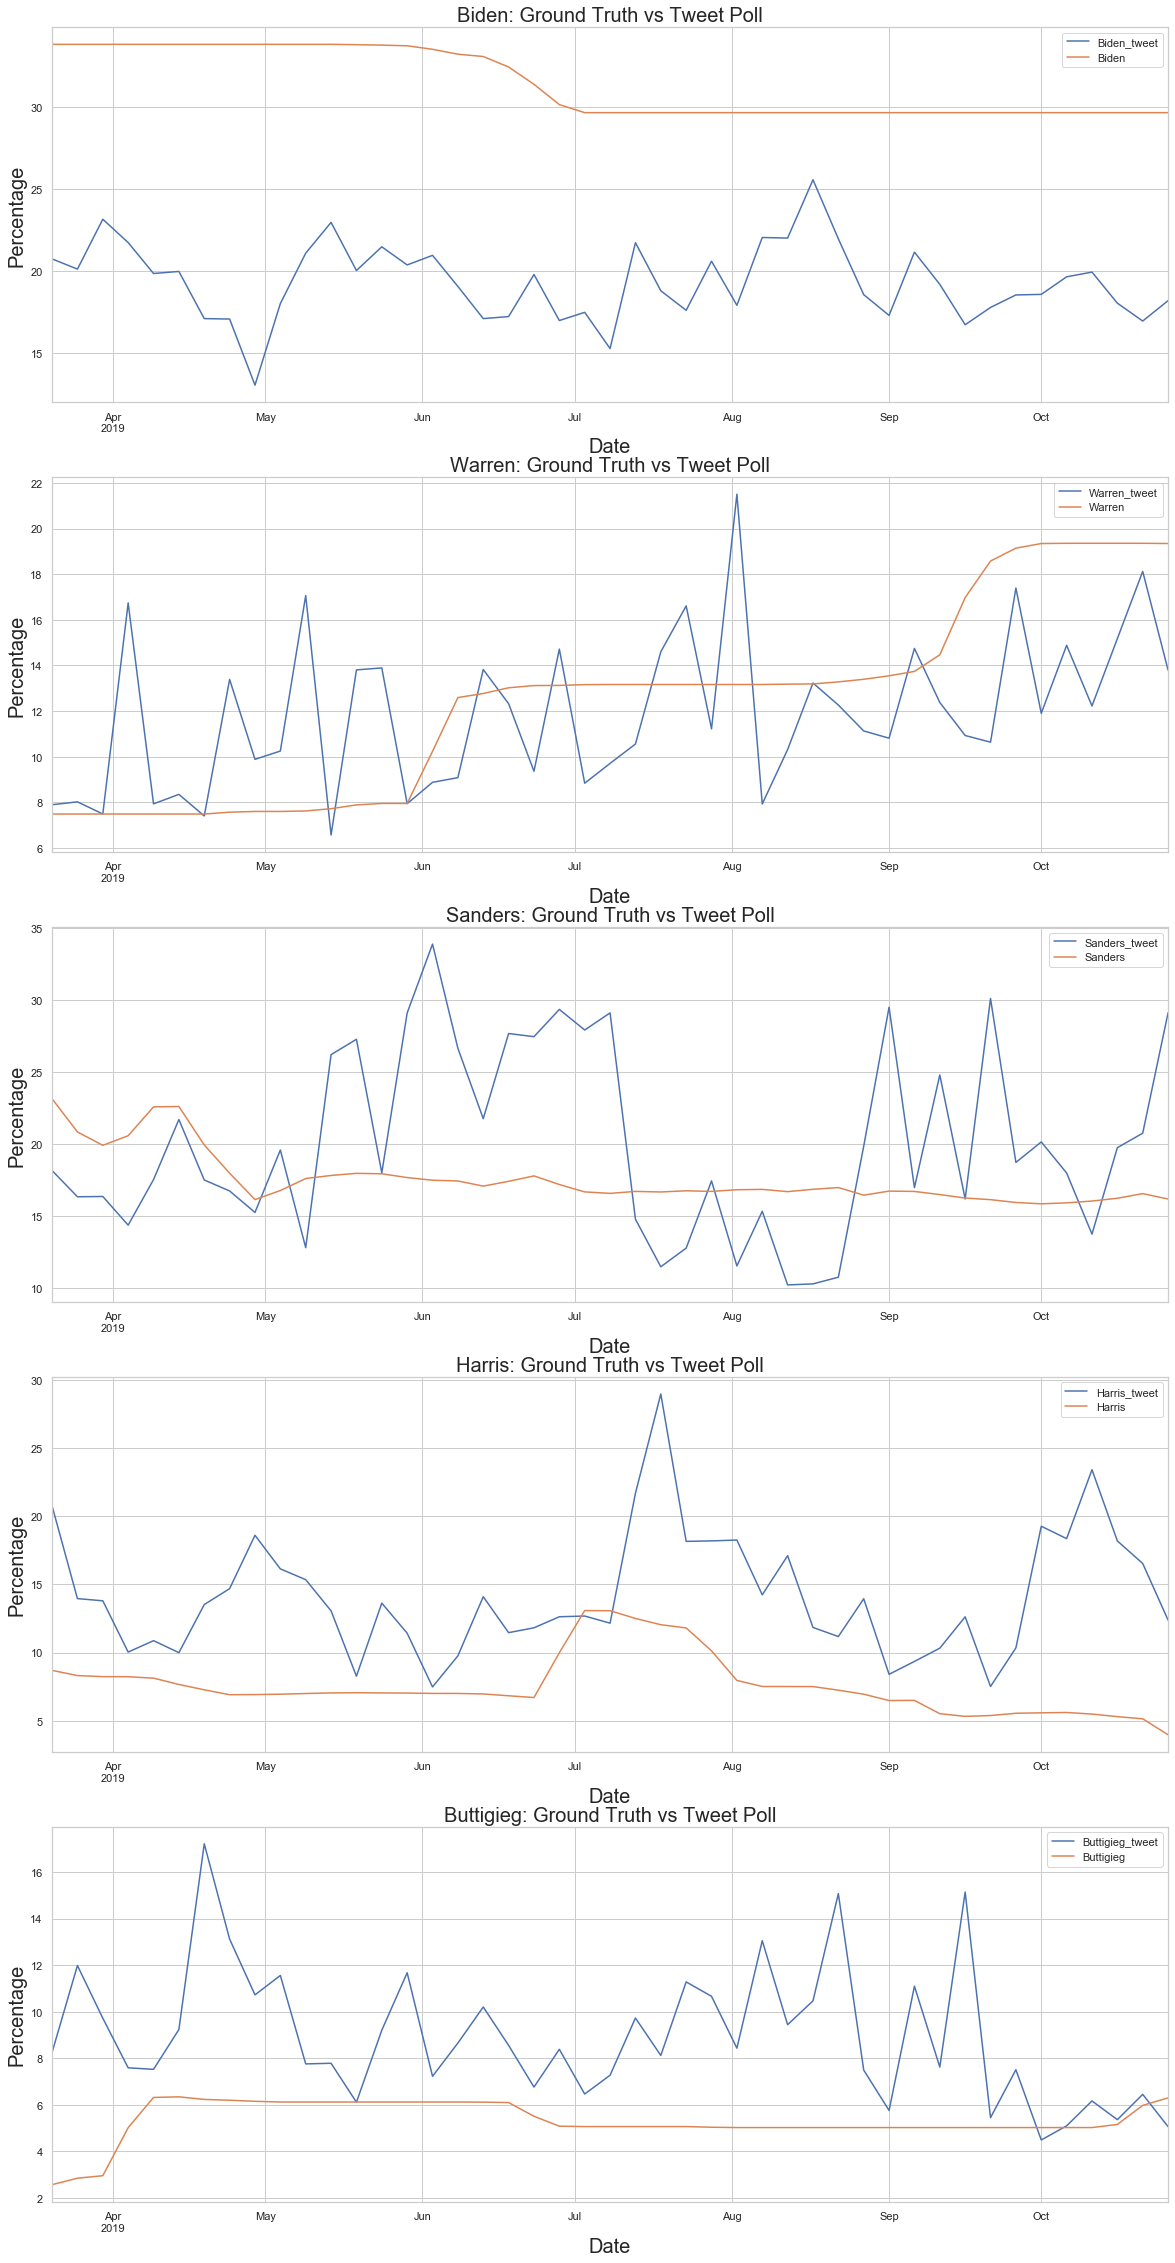

In [89]:
plot_results(tweet_post_df, ground_truth_truncated)

## Repeating the Analysis with sentiment threshold set at 0.7

In [67]:
tweet_df_filtered1 = tweet_df[['Number of tweets >= 0.7_Warren', 'Number of tweets >= 0.7_Biden',
                             'Number of tweets >= 0.7_x', 'Number of tweets >= 0.7_y', 
                              'Number of tweets >= 0.7']]
tweet_df_filtered1.head()

,Number of tweets >= 0.7_Warren,Number of tweets >= 0.7_Biden,Number of tweets >= 0.7_x,Number of tweets >= 0.7_y,Number of tweets >= 0.7
Date,,,,,
2019-03-03,874.0,617.0,1011.0,151.0,1157.0
2019-03-04,395.0,213.0,599.0,132.0,328.0
2019-03-05,NaN,453.0,916.0,146.0,605.0
2019-03-06,303.0,353.0,209.0,639.0,558.0
2019-03-07,579.0,687.0,251.0,558.0,537.0


In [68]:
tweet_5D_nonan1 = tweet_df_filtered1.iloc[12:, :].resample('5D').mean()
tweet_5D_nonan1.head()

,Number of tweets >= 0.7_Warren,Number of tweets >= 0.7_Biden,Number of tweets >= 0.7_x,Number of tweets >= 0.7_y,Number of tweets >= 0.7
Date,,,,,
2019-03-15,304.75,286.25,408.8,1273.8,681.0
2019-03-20,489.00,338.00,397.6,730.8,1013.0
2019-03-25,557.00,325.60,400.2,735.2,704.2
2019-03-30,689.75,1303.25,382.4,682.0,776.4
2019-04-04,512.80,460.40,784.0,667.4,654.2


In [69]:
tweet_5D_nonan1 = tweet_5D_nonan1.dropna()
print(tweet_5D_nonan1.shape)
tweet_5D_nonan1.head()

(46, 5)


,Number of tweets >= 0.7_Warren,Number of tweets >= 0.7_Biden,Number of tweets >= 0.7_x,Number of tweets >= 0.7_y,Number of tweets >= 0.7
Date,,,,,
2019-03-15,304.75,286.25,408.8,1273.8,681.0
2019-03-20,489.00,338.00,397.6,730.8,1013.0
2019-03-25,557.00,325.60,400.2,735.2,704.2
2019-03-30,689.75,1303.25,382.4,682.0,776.4
2019-04-04,512.80,460.40,784.0,667.4,654.2


In [70]:
tweet_post_df1 = calc_post_mean_df(best_guess_truncated, tweet_5D_nonan1, best_guess_truncated.index)
tweet_post_df1.head()

,Biden_tweet,Warren_tweet,Sanders_tweet,Harris_tweet,Buttigieg_tweet
index,,,,,
2019-03-15,20.811686,7.057287,17.898934,20.643160,9.370210
2019-03-20,20.321575,7.108109,16.112801,13.839500,13.004474
2019-03-25,22.953801,6.808641,16.424838,13.818332,10.489491
2019-03-30,22.404813,14.964366,14.364389,10.248142,8.460014
2019-04-04,20.200537,7.242860,17.369027,10.802116,8.067419


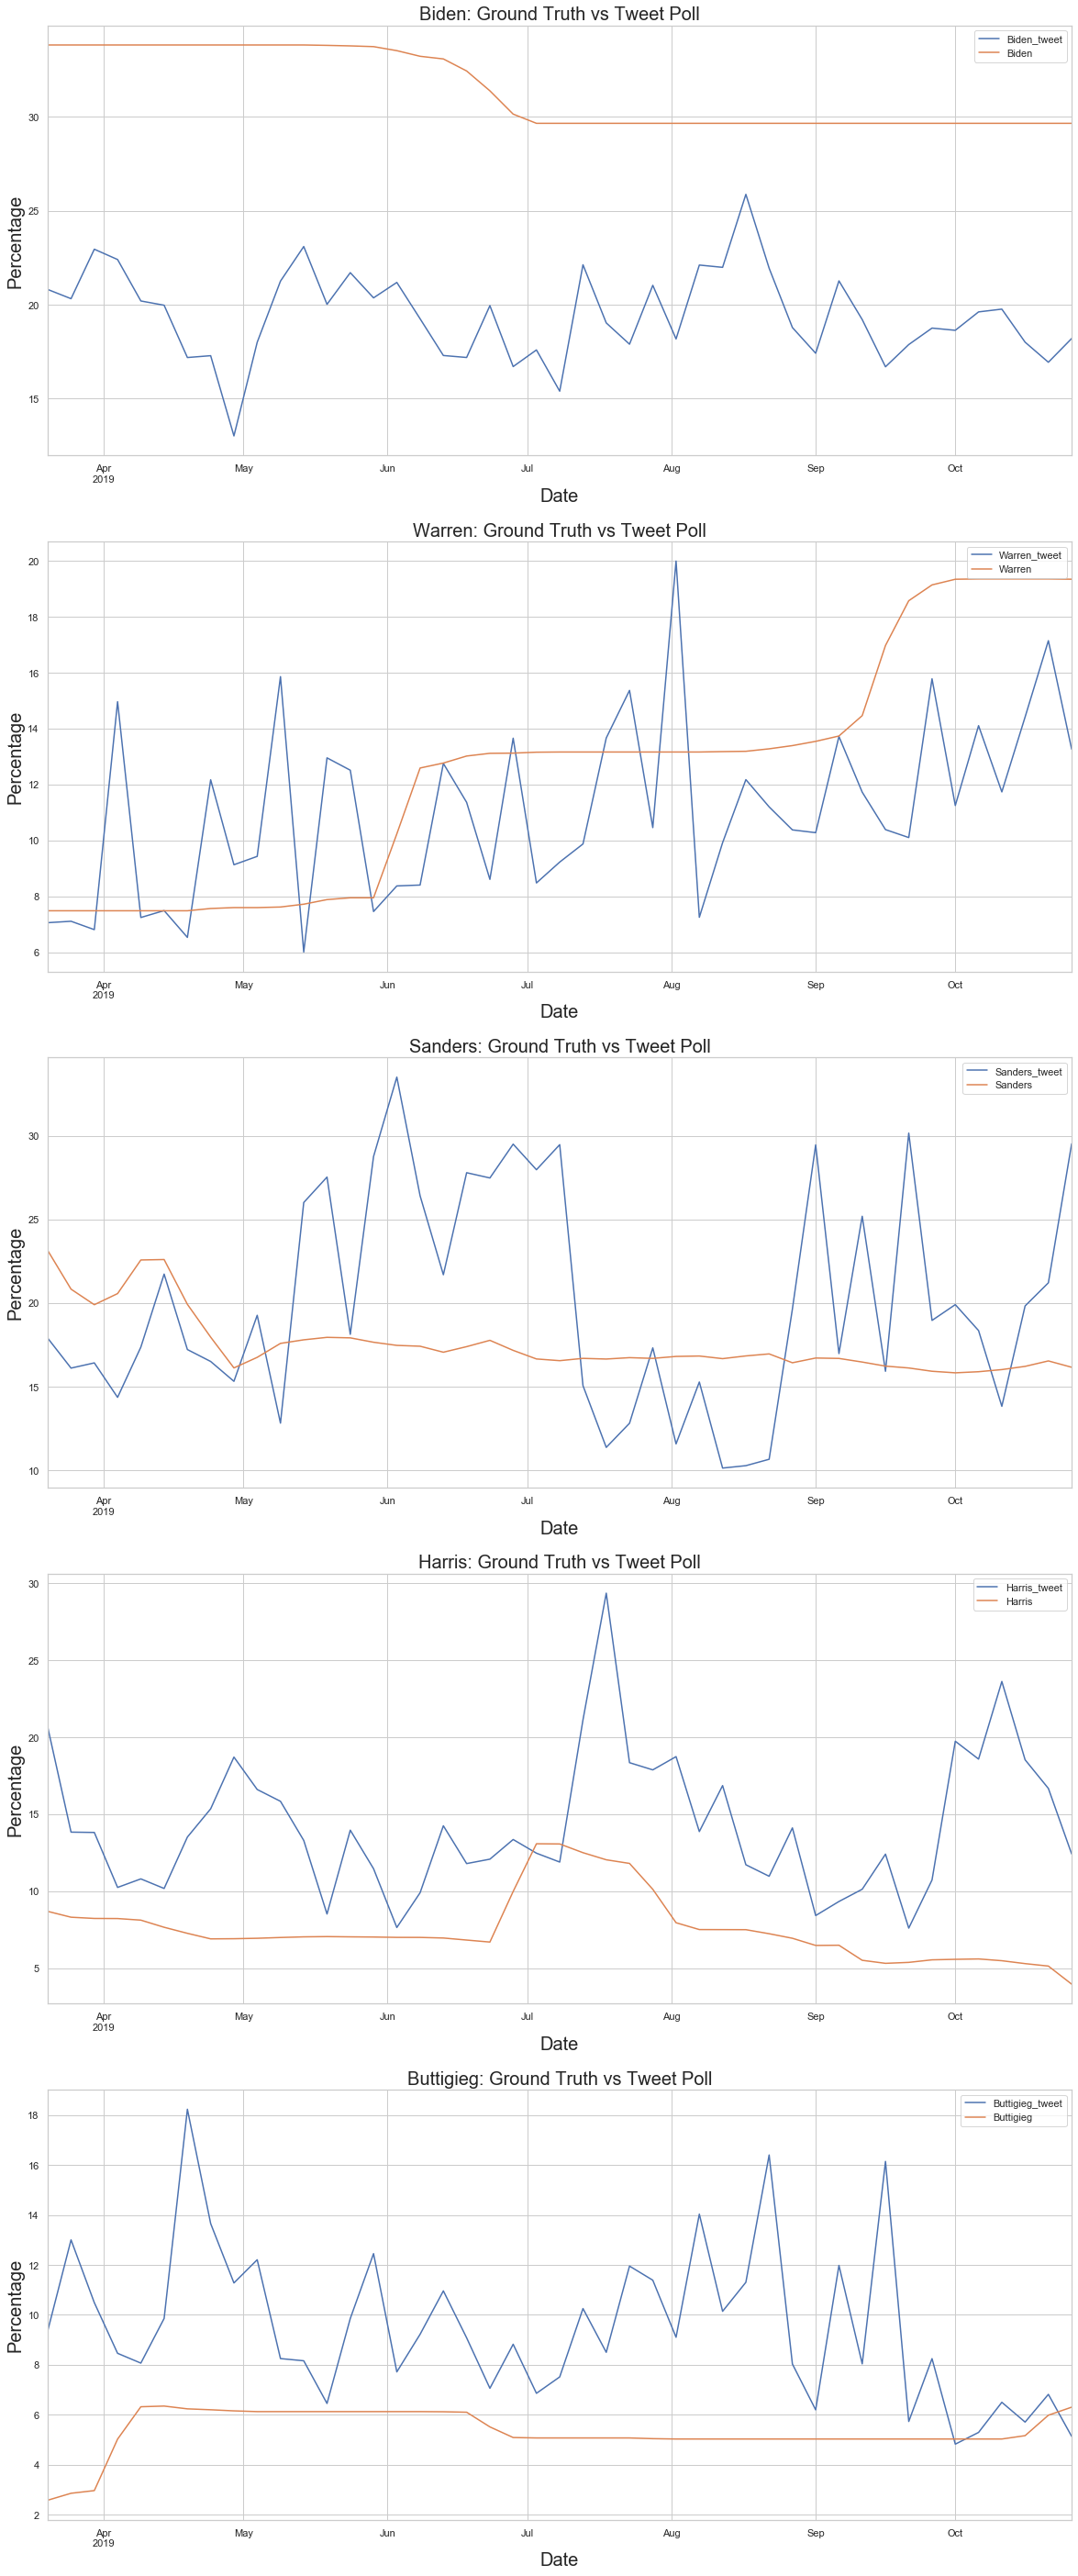

In [71]:
plot_results(tweet_post_df1, ground_truth_truncated)